### Project Sentiment Analysis Reviews Moviews IMDB

##### Using probabilistic algorithms to classify sentiment in user reviews of a dataset with 50,000 movie reviews.

##### Project using natural language processing and supervised learning algorithms.

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
# Imports
import re
import pickle
import nltk
import sklearn
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score


In [2]:
# import dataset
data = pd.read_csv('dataset.csv')

In [4]:
data.shape

(50000, 2)

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### Data Cleaning and Treatment

In [6]:
## labels sentiment
data.sentiment.replace('positive', 1, inplace=True)
data.sentiment.replace('negative', 0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17504\2943381358.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.sentiment.replace('negative', 0, inplace=True)


In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [12]:
data.review[12]

'So im not a big fan of Boll\'s work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he\'s not really staying true to the whole Carver agenda but we

In [13]:
## Function cleaning
def data_clear(texto):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned, '', texto)

In [14]:
# test function
text_tags = "<p>Teste text in tags HTML <b>com</b> tags HTML.</p>"
cleaned_text = data_clear(text_tags)
print(cleaned_text)

Teste text in tags HTML com tags HTML.


In [15]:
# Apply in dataset
data.review = data.review.apply(data_clear)

In [16]:
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [17]:
data.review[1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [18]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [21]:
## Cleaning special caracters
def data_clear_special_carac(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

In [22]:
# test function
text_special_caract = "Hello World! How's doing?"
cleaned_text2 = data_clear_special_carac(text_special_caract)
print(cleaned_text2)


Hello World  How s doing 


In [23]:
## Apply
data.review = data.review.apply(data_clear_special_carac)

In [24]:
data.review[1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [25]:
# function converte text
def convert_lower(text):
    return text.lower()

In [26]:
# test
phrase = 'ThAt is a phrAse with LETTERS CApitAl'
out_phrase = convert_lower(phrase)
print(out_phrase)

that is a phrase with letters capital


In [27]:
# apply
data.review = data.review.apply(convert_lower)

In [28]:
data.review[8]

'encouraged by the positive comments about this film on here i was looking forward to watching this film  bad mistake  i ve seen 950  films and this is truly one of the worst of them   it s awful in almost every way  editing  pacing  storyline   acting   soundtrack  the film s only song   a lame country tune   is played no less than four times   the film looks cheap and nasty and is boring in the extreme  rarely have i been so happy to see the end credits of a film  the only thing that prevents me giving this a 1 score is harvey keitel   while this is far from his best performance he at least seems to be making a bit of an effort  one for keitel obsessives only '

In [29]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
# remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(text))
    return [w for w in words if w not in stop_words]

In [31]:
# test
in_phrase = 'They are right, as this is exactly what happened with me.'
out_phrase2 = remove_stopwords(in_phrase)
print(out_phrase2)

['They', 'right', ',', 'exactly', 'happened', '.']


In [32]:
%%time
data.review = data.review.apply(remove_stopwords)

CPU times: total: 44.1 s
Wall time: 45.5 s


In [34]:
data.review[3]

['basically',
 'family',
 'little',
 'boy',
 'jake',
 'thinks',
 'zombie',
 'closet',
 'parents',
 'fighting',
 'time',
 'movie',
 'slower',
 'soap',
 'opera',
 'suddenly',
 'jake',
 'decides',
 'become',
 'rambo',
 'kill',
 'zombie',
 'ok',
 'first',
 'going',
 'make',
 'film',
 'must',
 'decide',
 'thriller',
 'drama',
 'drama',
 'movie',
 'watchable',
 'parents',
 'divorcing',
 'arguing',
 'like',
 'real',
 'life',
 'jake',
 'closet',
 'totally',
 'ruins',
 'film',
 'expected',
 'see',
 'boogeyman',
 'similar',
 'movie',
 'instead',
 'watched',
 'drama',
 'meaningless',
 'thriller',
 'spots',
 '3',
 '10',
 'well',
 'playing',
 'parents',
 'descent',
 'dialogs',
 'shots',
 'jake',
 'ignore']

In [35]:
# function steamer
def stemmer(text):
    object_stemmer = SnowballStemmer('english')
    return " ".join([object_stemmer.stem(w) for w in text])

In [36]:
# test
text1 = "the cat are running"
text_stemmed = stemmer(text1.split())
print(text_stemmed)

the cat are run


In [37]:
%%time
data.review = data.review.apply(stemmer)

CPU times: total: 1min 6s
Wall time: 1min 8s


In [38]:
data.review[25]

'karen carpent stori show littl singer karen carpent complex life though fail give accur fact detail cynthia gibb portray karen fine elect good actress play naiv sort dumb karen carpent think role need stronger charact someon stronger person louis fletcher role agn carpent terrif great job karen mother great song could includ soundtrack album unfortun though movi top rate usa sever countri'

### Pre-processing

In [39]:
## Increase max_colwidth
pd.set_option('display.max_colwidth', 120)

In [40]:
origin_dataset = pd.read_csv('dataset.csv')

In [41]:
origin_dataset.head(10)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as ...",positive
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and g...,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fightin...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portr...",positive
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's no...",positive
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring ba...,positive
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brill...",negative
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake...,negative
9,If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love thi...,positive


In [42]:
data.head(10)

,review,sentiment
0,one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set...,1
1,wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir p...,1
2,thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi plot simplist dialo...,1
3,basic famili littl boy jake think zombi closet parent fight time movi slower soap opera sudden jake decid becom ramb...,0
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us...,1
5,probabl time favorit movi stori selfless sacrific dedic nobl caus preachi bore never get old despit seen 15 time las...,1
6,sure would like see resurrect date seahunt seri tech today would bring back kid excit grew black white tv seahunt gu...,1
7,show amaz fresh innov idea 70 first air first 7 8 year brilliant thing drop 1990 show realli funni anymor continu de...,0
8,encourag posit comment film look forward watch film bad mistak seen 950 film truli one worst aw almost everi way edi...,0
9,like origin gut wrench laughter like movi young old love movi hell even mom like great camp,1


In [43]:
del origin_dataset

In [44]:
# Division data
x = np.array(data.iloc[:, 0].values)

In [45]:
y= np.array(data.sentiment.values)

In [46]:
# Division train and test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [47]:
type(x_train)

numpy.ndarray

In [48]:
## Vetorization
vectorizer = CountVectorizer(max_features=1000)

In [49]:
x_train_final = vectorizer.fit_transform(x_train).toarray()

In [50]:
x_test_final = vectorizer.transform(x_test).toarray()

In [51]:
print("x_train_final:", x_train_final.shape)
print("y_train:", y_train.shape)

x_train_final: (40000, 1000)
y_train: (40000,)


In [52]:
print(x_train_final)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
print("x_test_final:", x_test_final.shape)
print("y_test:", y_test.shape)

x_test_final: (10000, 1000)
y_test: (10000,)


#### Modeling

Model 1 - GaussianNB

In [54]:
model_gaussianNB = GaussianNB()

In [55]:
model_gaussianNB.fit(x_train_final, y_train)

GaussianNB()

Model 2 - MultinomialNB

In [57]:
model_multinomialNB = MultinomialNB(alpha = 1.0, fit_prior=True)

In [58]:
model_multinomialNB.fit(x_train_final, y_train)

MultinomialNB()

Model 3 - BernoulliNB

In [59]:
model_bernoulliNB = BernoulliNB(alpha=1.0, fit_prior=True)

In [60]:
model_bernoulliNB.fit(x_train_final, y_train)

BernoulliNB()

Avaliation

In [61]:
# Previsious in test
ypred_v1 = model_gaussianNB.predict(x_test_final)

In [62]:
ypred_v2 = model_multinomialNB.predict(x_test_final)

In [63]:
ypred_v3 = model_bernoulliNB.predict(x_test_final)

In [98]:
accuracy_score_GaussianNB = accuracy_score(y_test, ypred_v1)* 100
accuracy_score_MultinomialNB = accuracy_score(y_test, ypred_v2)* 100
accuracy_score_BernoulliNB = accuracy_score(y_test, ypred_v3)* 100

In [100]:
print("Accuracy Model GaussianNB = ", accuracy_score_GaussianNB)
print("Accuracy Model MultinomialNB = ", accuracy_score_MultinomialNB)
print("Accuracy Model BernoulliNB = ", accuracy_score_BernoulliNB)

Accuracy Model GaussianNB =  79.06
Accuracy Model MultinomialNB =  82.57
Accuracy Model BernoulliNB =  83.02000000000001


In [65]:
# import
from sklearn.metrics import roc_auc_score

In [102]:
# AUC GaussianNB
y_proba = model_gaussianNB.predict_proba(x_test_final)[:, 1]
auc_gaussianNB = roc_auc_score(y_test, y_proba)

In [103]:
# AUC MultinomialNB
y_proba = model_multinomialNB.predict_proba(x_test_final)[:, 1]
auc_multinomialNB= roc_auc_score(y_test, y_proba)

In [104]:
# AUC BernoulliNB
y_proba = model_bernoulliNB.predict_proba(x_test_final)[:, 1]
auc_bernoulliNB = roc_auc_score(y_test, y_proba)

In [105]:
print("AUC_Score Model GaussianNB = ", auc_gaussianNB)
print("AUC_Score Model MultinomialNB = ", auc_multinomialNB)
print("AUC_Score Model BernoulliNB = ", auc_bernoulliNB)

AUC_Score Model GaussianNB =  0.861081232980416
AUC_Score Model MultinomialNB =  0.8993217067636314
AUC_Score Model BernoulliNB =  0.9083430688103717


In [70]:
## Best Model BernoulliNB 
with open('model_bernoulliNB.pkl', 'wb') as archive:
    pickle.dump(model_bernoulliNB, archive)

In [85]:
thresh = 0.5

In [108]:
results = pd.DataFrame({'Model':['GaussianNB', 'MultinomialNB', 'BernoulliNB'],
                           'auc':[auc_gaussianNB,
                                  auc_multinomialNB,
                                  auc_bernoulliNB,
                                  ],
                           'accuracy':[accuracy_score_GaussianNB,
                                       accuracy_score_MultinomialNB,
                                       accuracy_score_BernoulliNB,]})

In [109]:
results

,Model,auc,accuracy
0,GaussianNB,0.861081,79.06
1,MultinomialNB,0.899322,82.57
2,BernoulliNB,0.908343,83.02


In [110]:
results.sort_values(by = 'auc', ascending = False)

,Model,auc,accuracy
2,BernoulliNB,0.908343,83.02
1,MultinomialNB,0.899322,82.57
0,GaussianNB,0.861081,79.06


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
print(results.columns) 

Index(['Model', 'auc', 'accuracy'], dtype='object')


Text(0.5, 1.0, 'Validation by AUC')

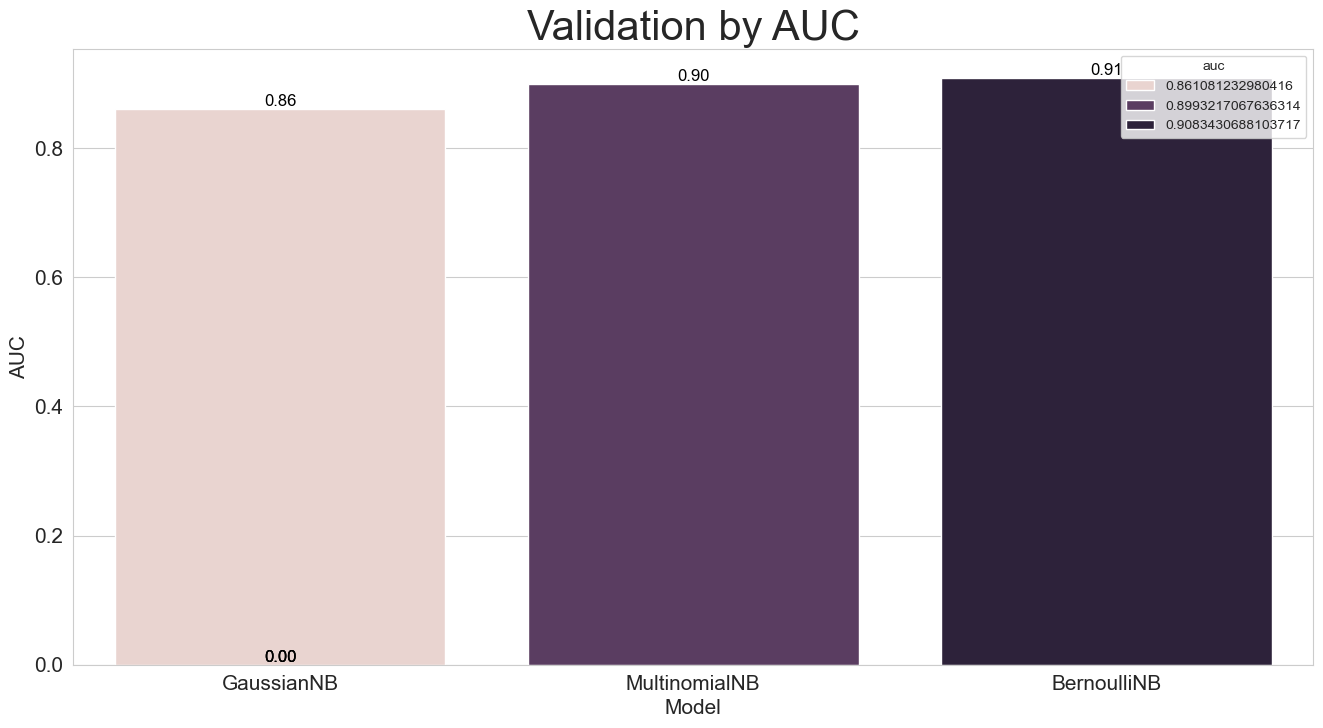

In [131]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

ax = sns.barplot(x = 'Model', y = 'auc', hue = 'auc', data = results,)

# Adicionando labels em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Texto do label (2 casas decimais)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='bottom', fontsize=12, color='black')


ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_title('Validation by AUC', fontsize = 30)



Deploy

In [71]:
## Load
with open('model_bernoulliNB.pkl', 'rb') as archive:
    final_model = pickle.load(archive)

In [72]:
# test positive sentiment
aval_text = """This is probably the fastest-paced and most action-packed of the German Edgar Wallace ""krimi"" 
series, a cross between the Dr. Mabuse films of yore and 60's pop thrillers like Batman and the Man 
from UNCLE. It reintroduces the outrageous villain from an earlier film who dons a stylish monk's habit and 
breaks the necks of victims with the curl of a deadly whip. Set at a posh girls' school filled with lecherous 
middle-aged professors, and with the cops fondling their hot-to-trot secretaries at every opportunity, it 
certainly is a throwback to those wonderfully politically-incorrect times. There's a definite link to a later 
Wallace-based film, the excellent giallo ""Whatever Happened to Solange?"", which also concerns female students 
being corrupted by (and corrupting?) their elders. Quite appropriate to the monk theme, the master-mind villain 
uses booby-trapped bibles here to deal some of the death blows, and also maintains a reptile-replete dungeon 
to amuse his captive audiences. <br /><br />Alfred Vohrer was always the most playful and visually flamboyant 
of the series directors, and here the lurid colour cinematography is the real star of the show. The Monk appears 
in a raving scarlet cowl and robe, tastefully setting off the lustrous white whip, while appearing against 
purplish-night backgrounds. There's also a voyeur-friendly turquoise swimming pool which looks great both 
as a glowing milieu for the nubile students and as a shadowy backdrop for one of the murder scenes. 
The trademark ""kicker"" of hiding the ""Ende"" card somewhere in the set of the last scene is also quite 
memorable here. And there's a fine brassy and twangy score for retro-music fans.<br /><br />Fans of the series 
will definitely miss the flippant Eddie Arent character in these later films. Instead, the chief inspector 
Sir John takes on the role of buffoon, convinced that he has mastered criminal psychology after taking a few 
night courses. Unfortunately, Klaus Kinski had also gone on to bigger and better things. The krimis had 
lost some of their offbeat subversive charm by this point, and now worked on a much more blatant pop-culture 
level, which will make this one quite accessible to uninitiated viewers."""

In [73]:
## Transform data
task1 = data_clear(aval_text)
task2 = data_clear_special_carac(task1)
task3 = convert_lower(task2)
task4 = remove_stopwords(task3)
task5 = stemmer(task4)

In [74]:
print(task5)

probabl fastest pace action pack german edgar wallac krimi seri cross dr mabus film yore 60 pop thriller like batman man uncl reintroduc outrag villain earlier film don stylish monk habit break neck victim curl dead whip set posh girl school fill lecher middl age professor cop fondl hot trot secretari everi opportun certain throwback wonder polit incorrect time definit link later wallac base film excel giallo whatev happen solang also concern femal student corrupt corrupt elder quit appropri monk theme master mind villain use boobi trap bibl deal death blow also maintain reptil replet dungeon amus captiv audienc alfr vohrer alway play visual flamboy seri director lurid colour cinematographi real star show monk appear rave scarlet cowl robe tast set lustrous white whip appear purplish night background also voyeur friend turquois swim pool look great glow milieu nubil student shadowi backdrop one murder scene trademark kicker hide end card somewher set last scene also quit memor fine bra

In [75]:
type(task5)

str

In [76]:
# Convert string in array
task5_array = np.array(task5)

In [77]:
type(task5_array)

numpy.ndarray

In [78]:
## vectorized 
aval_text = vectorizer.transform(np.array([task5_array])).toarray()

In [79]:
type(aval_text)

numpy.ndarray

In [82]:
prediction = final_model.predict(aval_text.reshape(1, 1000))

In [83]:
print(prediction)

[1]


In [84]:
# Conditional structure to check the prediction value
if prediction == 1:
    print("Text Indicates Positive Sentiment!")
else:
    print("Text Indicates Negative Sentiment!")

Text Indicates Positive Sentiment!
